## Import Libraries

In [2]:
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Database Connection

In [3]:
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='1218',
    database='movie_analysis_db'
)

print("Connected!")

Connected!


## Top 5 Highest Rated Movies

In [4]:
cursor = connection.cursor()

query = 'select * from movies_dataset order by rating desc limit 5'

cursor.execute(query)

cursor.description

columns = [desc[0] for desc in cursor.description]

results = cursor.fetchall()
top_5 = pd.DataFrame(results, columns=columns)
top_5

,movie_name,genre,release_year,rating,votes,duration
0,The Dark Knight,Action,2008,9.0,2300000,152
1,Inception,Sci-Fi,2010,8.8,2000000,148
2,The Matrix,Sci-Fi,1999,8.7,1700000,136
3,Interstellar,Sci-Fi,2014,8.6,1600000,169
4,Parasite,Thriller,2019,8.6,700000,132


## Average Rating Per Genre

In [5]:
cursor = connection.cursor()

query = '''select genre, round(avg(rating), 1) as avg_genre_rating from movies_dataset
group by genre order by avg_genre_rating desc'''

cursor.execute(query)

cursor.description

columns = [desc[0] for desc in cursor.description]

results = cursor.fetchall()
avg_rating = pd.DataFrame(results, columns=columns)
avg_rating

,genre,avg_genre_rating
0,Thriller,8.6
1,Sci-Fi,8.5
2,Drama,8.5
3,Animation,8.2
4,Adventure,8.1
5,Action,8.0
6,Romance,7.9


## Movies Released Per Year

In [6]:
cursor = connection.cursor()

query = '''select release_year, count(movie_name) as movies_count
from movies_dataset group by release_year order by release_year'''

cursor.execute(query)

cursor.description

columns = [desc[0] for desc in cursor.description]

results = cursor.fetchall()
movies_count = pd.DataFrame(results, columns=columns)
movies_count

,release_year,movies_count
0,1993,1
1,1994,1
2,1995,1
3,1997,1
4,1999,1
5,2000,1
6,2002,1
7,2003,1
8,2008,1
9,2009,2


## Highly Rated Popular Movies (rating > 8.0 & votes > 50,000)

In [8]:
cursor = connection.cursor()

query = '''select * from movies_dataset where rating > 8.0 and votes > 50000'''

cursor.execute(query)

cursor.description

columns = [desc[0] for desc in cursor.description]

results = cursor.fetchall()
highly_rated_popular_movies = pd.DataFrame(results, columns=columns)
highly_rated_popular_movies

,movie_name,genre,release_year,rating,votes,duration
0,Inception,Sci-Fi,2010,8.8,2000000,148
1,The Dark Knight,Action,2008,9.0,2300000,152
2,Interstellar,Sci-Fi,2014,8.6,1600000,169
3,Joker,Drama,2019,8.5,1400000,122
4,The Lion King,Animation,1994,8.5,1000000,88
5,Toy Story,Animation,1995,8.3,800000,81
6,Parasite,Thriller,2019,8.6,700000,132
7,Gladiator,Action,2000,8.5,1500000,155
8,Coco,Animation,2017,8.4,600000,105
9,Finding Nemo,Animation,2003,8.1,750000,100


## Genre with the Highest Average Votes

In [9]:
cursor = connection.cursor()

query = '''select genre, avg(votes) avg_genre_votes from movies_dataset group by genre
order by avg(votes) desc limit 1'''

cursor.execute(query)

cursor.description

columns = [desc[0] for desc in cursor.description]

results = cursor.fetchall()
h_avg_rating = pd.DataFrame(results, columns=columns)
h_avg_rating

,genre,avg_genre_votes
0,Sci-Fi,1625000.0000


## Longest Movie by Duration

In [10]:
cursor = connection.cursor()

query = '''select * from movies_dataset order by duration desc limit 1'''

cursor.execute(query)

cursor.description

columns = [desc[0] for desc in cursor.description]

results = cursor.fetchall()
long_movie = pd.DataFrame(results, columns=columns)
long_movie

,movie_name,genre,release_year,rating,votes,duration
0,Titanic,Romance,1997,7.9,1100000,195


## Bar Chart — Genre vs Average Rating

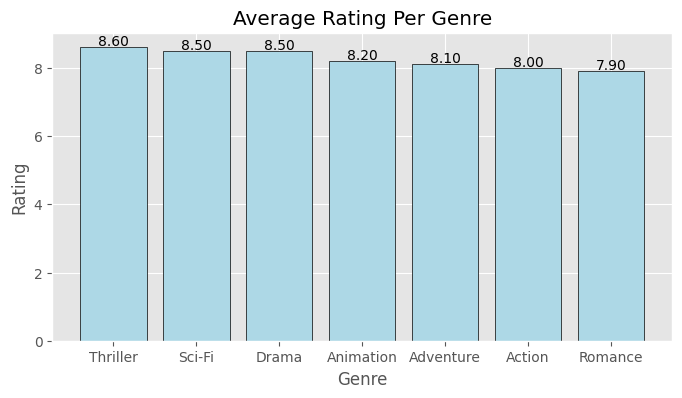

In [11]:
plt.style.use("ggplot")
plt.figure(figsize=(8, 4))
plt.bar(avg_rating['genre'], avg_rating['avg_genre_rating'], color="lightblue", edgecolor="black")
plt.title("Average Rating Per Genre")
plt.xlabel("Genre")
plt.ylabel("Rating")

for i, v in enumerate(avg_rating['avg_genre_rating']):  
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center')

plt.savefig("visualization/genre_avg_rating.png")
plt.show()

## Line Plot — Movies Released Per Year

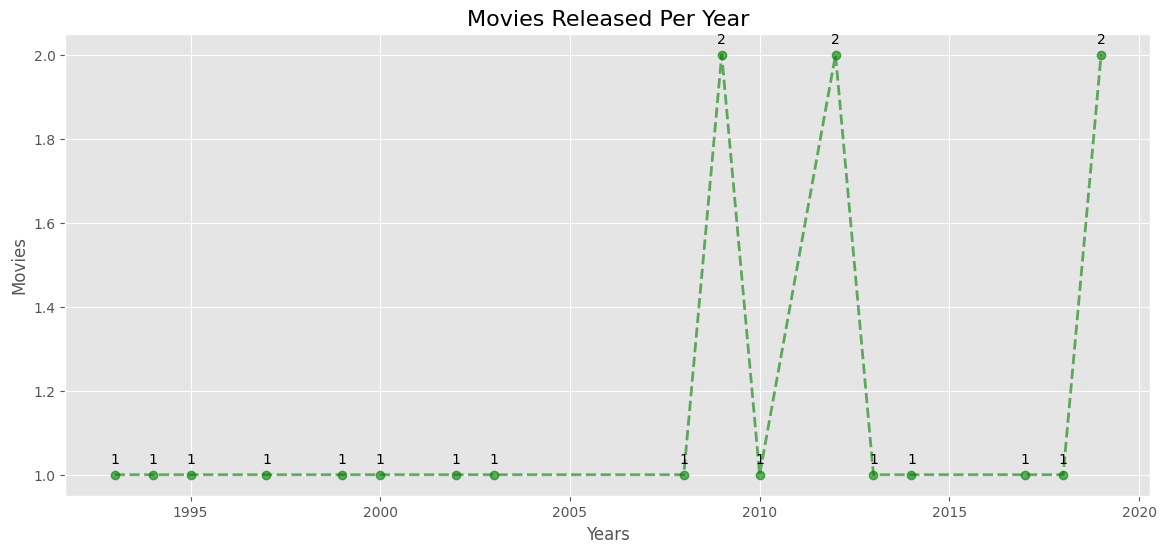

In [18]:
plt.figure(figsize=(14, 6))

plt.plot(movies_count['release_year'], movies_count['movies_count'],
         marker="o", color="green", linewidth=2, alpha=0.6, linestyle="--")
plt.title("Movies Released Per Year", fontsize=16)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Movies", fontsize=12)

# Display values over bars
for idx, row in movies_count.iterrows():
    plt.text(row['release_year'], row['movies_count'] + max(movies_count['movies_count'])*0.01, 
             str(row['movies_count']), ha="center", va="bottom")

plt.savefig("visualization/movies_per_year.png")
plt.show()